In [2]:
import pydataset
mpg=pydataset.data('mpg')

In [4]:
mpg.fl.unique()

array(['p', 'r', 'e', 'd', 'c'], dtype=object)

In [18]:
mpg.query("fl == ['p', 'r', 'e']")
mpg[mpg['fl'].isin(['p','r','e'])] 
mpg.query("fl in ['p', 'r', 'e']") 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [20]:
mpg['class'].astype('category')

1      compact
2      compact
3      compact
4      compact
5      compact
        ...   
230    midsize
231    midsize
232    midsize
233    midsize
234    midsize
Name: class, Length: 234, dtype: category
Categories (7, object): ['2seater', 'compact', 'midsize', 'minivan', 'pickup', 'subcompact', 'suv']

In [22]:
import numpy as np
mpg['cty'] = np.where(mpg['cty']%2==0, mpg['cty']+2, mpg['cty']+1 )

In [23]:
for i in range(len(mpg)):
    if mpg.iloc[i, 7] % 2 == 0: # 7열인가 봄 
        mpg.iloc[i, 7] += 2
    else:
        mpg.iloc[i, 7] += 1 

In [24]:
mpg.cty.apply(lambda x:  x+2 if x%2 == 0 else x+1) 

1      24
2      26
3      26
4      26
5      22
       ..
230    24
231    26
232    22
233    24
234    22
Name: cty, Length: 234, dtype: int64

In [25]:
def add(x):
    if x%2==0:
        return x+2
    else:
        return x+1
mpg['cty'].apply(add)    

1      24
2      26
3      26
4      26
5      22
       ..
230    24
231    26
232    22
233    24
234    22
Name: cty, Length: 234, dtype: int64

In [ ]:
list(map(add, mpg['cty']))
list(filter(add, mpg.cty))

In [27]:
mpg.hwy.describe()

count    234.000000
mean      23.440171
std        5.954643
min       12.000000
25%       18.000000
50%       24.000000
75%       27.000000
max       44.000000
Name: hwy, dtype: float64

In [28]:
import pandas as pd

In [39]:
bins = [0, 20, 30, 40]
mpg['rank']= pd.cut(mpg['hwy'], bins= [0,20, 30, 40, 100] , right=True, labels =['A','B','C','D'])
mpg['rank']

1      B
2      B
3      C
4      B
5      B
      ..
230    B
231    B
232    B
233    B
234    B
Name: rank, Length: 234, dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

In [ ]:
mpg['rank'] = np.where(mpg['hwy']<=20, 
                       'A', (np.where(mpg['hwy']<=30, 
                                      'B', (np.where(mpg['hwy'] <= 40, 'C', 'D')))))

In [ ]:
def grade(x):
    if x < 20:
        return 'A'
    elif x < 30:
        return 'B'
    elif x < 40:
        return 'C'
    elif x >= 40:
        return 'D'
    
mpg['rank'] = mpg['hwy'].map(grade)
mpg 

In [51]:
import re
re.sub("auto.*", "auto", mpg['trans'])

TypeError: expected string or bytes-like object

In [52]:
mpg[mpg['trans'].str.contains('auto')] 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,rank
1,audi,a4,1.8,1999,4,auto(l5),f,22,29,p,compact,B
4,audi,a4,2.0,2008,4,auto(av),f,24,30,p,compact,B
5,audi,a4,2.8,1999,6,auto(l5),f,20,26,p,compact,B
7,audi,a4,3.1,2008,6,auto(av),f,22,27,p,compact,B
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,20,25,p,compact,B
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,22,27,p,compact,B
12,audi,a4 quattro,2.8,1999,6,auto(l5),4,18,25,p,compact,B
14,audi,a4 quattro,3.1,2008,6,auto(s6),4,20,25,p,compact,B
16,audi,a6 quattro,2.8,1999,6,auto(l5),4,18,24,p,midsize,B
17,audi,a6 quattro,3.1,2008,6,auto(s6),4,20,25,p,midsize,B


In [53]:
mpg[mpg["trans"].str[:4] == "auto"] 

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,rank
1,audi,a4,1.8,1999,4,auto(l5),f,22,29,p,compact,B
4,audi,a4,2.0,2008,4,auto(av),f,24,30,p,compact,B
5,audi,a4,2.8,1999,6,auto(l5),f,20,26,p,compact,B
7,audi,a4,3.1,2008,6,auto(av),f,22,27,p,compact,B
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,20,25,p,compact,B
11,audi,a4 quattro,2.0,2008,4,auto(s6),4,22,27,p,compact,B
12,audi,a4 quattro,2.8,1999,6,auto(l5),4,18,25,p,compact,B
14,audi,a4 quattro,3.1,2008,6,auto(s6),4,20,25,p,compact,B
16,audi,a6 quattro,2.8,1999,6,auto(l5),4,18,24,p,midsize,B
17,audi,a6 quattro,3.1,2008,6,auto(s6),4,20,25,p,midsize,B


# 온도 예측 문제

In [2]:
from tensorflow import keras

In [3]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")

with open(fname) as f:
    data =f.read()
    
lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [82]:
lines[:3]

['01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30',
 '01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10',
 '01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60']

In [84]:
temperature.shape

(420451,)

In [85]:
raw_data.shape

(420451, 14)

In [4]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]
temperature[:3] 

array([-8.02, -8.41, -8.51])

In [57]:
raw_data[:3]

array([[ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
         9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
         1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
         1.75000e+00,  1.52300e+02],
       [ 9.96570e+02, -8.41000e+00,  2.65010e+02, -9.28000e+00,
         9.34000e+01,  3.23000e+00,  3.02000e+00,  2.10000e-01,
         1.89000e+00,  3.03000e+00,  1.30980e+03,  7.20000e-01,
         1.50000e+00,  1.36100e+02],
       [ 9.96530e+02, -8.51000e+00,  2.64910e+02, -9.31000e+00,
         9.39000e+01,  3.21000e+00,  3.01000e+00,  2.00000e-01,
         1.88000e+00,  3.02000e+00,  1.31024e+03,  1.90000e-01,
         6.30000e-01,  1.71600e+02]])

In [77]:
raw_data

array([[ 0.91365151, -1.92064015, -1.97449272, ..., -0.73016651,
        -0.77935289, -0.28119316],
       [ 0.91953033, -1.96510495, -2.01848295, ..., -0.93230685,
        -0.88696976, -0.46989368],
       [ 0.91482727, -1.97650618, -2.0297625 , ..., -1.27790162,
        -1.26147647, -0.05638329],
       ...,
       [ 1.30165361, -1.36654038, -1.45450563, ..., -0.69756323,
        -0.67173602,  0.45147737],
       [ 1.30047784, -1.48853354, -1.57519677, ..., -0.43021634,
        -0.60286122,  0.57494808],
       [ 1.30165361, -1.5558008 , -1.64061814, ..., -0.59975339,
        -0.68895472,  0.09853751]])

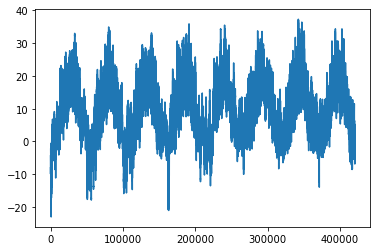

<Figure size 720x720 with 0 Axes>

In [60]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)
plt.figure(figsize=(10,10))
plt.show() 

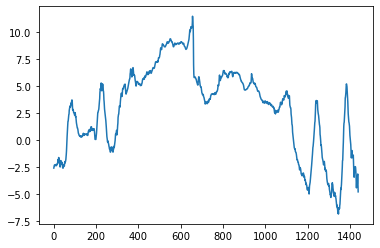

In [63]:
plt.plot(range(1440), temperature[-1440:])
plt.show()

# 밀집 연결모델

In [5]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples) 

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


In [6]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std 

In [ ]:
X_data : 1, 2, 3, 4, 5, 6, 7, 8, 9 .....
1, 2, 3 
2, ,3, 4


target : 

In [89]:
dummy_dataset

ValueError: too many values to unpack (expected 2)

In [7]:
import numpy as np
from tensorflow import keras
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset: # 5번돈다.
    print(inputs.shape) # 0행을 가져온다. 
    for i in range(inputs.shape[0]): # 0은 2이다. 2의 범위만큼
        print([int(x) for x in inputs[i]], int(targets[i])) # 012 0개, 3개는 1개 

(2, 3)
[0, 1, 2] 3
[1, 2, 3] 4
(2, 3)
[2, 3, 4] 5
[3, 4, 5] 6
(1, 3)
[4, 5, 6] 7


In [75]:
delay # 예측하고자 하는 날짜의 텀.. 분단위로 본다.  5일하고 23시간이다. 6일꺼 데이터를 보기위해서 
# 그전데이터를 가지고 쓴다.

858

In [92]:
len(raw_data)

420451

In [94]:
len(raw_data[:-delay])

419593

In [96]:
len(temperature[delay:])

419593

In [8]:
sampling_rate = 6 #1시간
sequence_length = 120 # 5일간 데이터  120시간 오늘치 측정하고 싶으면 그앞에 120개 
delay = sampling_rate * (sequence_length + 24 - 1) # 6 *(120 +24 -1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay], 
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True, # 왜 섞었는지?
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples) 

In [72]:
for samples, targets in train_dataset:
    print("샘플 크기:", samples.shape)
    print("타깃 크기:", targets.shape)
    break 

샘플 크기: (256, 120, 14)
타깃 크기: (256,)


In [101]:
raw_data.shape # 

(420451, 14)

In [102]:
x = layers.Flatten()(inputs)
x

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[4, 5, 6]])>

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1])) # 14개 2차원이다. 
x = layers.Flatten()(inputs) # 왜 플레튼 부터 시키는지? 1차원으로 바꾸기 위해? 
x = layers.Dense(16, activation="relu")(x)
outputs = layers.Dense(1)(x) #시계열이니 결과가 1개나오고 그럴 실제와 비교하는 것이다. 
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_dense.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_dense.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}") 

Epoch 1/10
819/819 [==============================] - 7s 8ms/step - loss: 12.3813 - mae: 2.7222 - val_loss: 10.2446 - val_mae: 2.5378
Epoch 2/10
819/819 [==============================] - 6s 7ms/step - loss: 8.8456 - mae: 2.3397 - val_loss: 12.9235 - val_mae: 2.8650
Epoch 3/10
819/819 [==============================] - 6s 7ms/step - loss: 8.0712 - mae: 2.2350 - val_loss: 10.6243 - val_mae: 2.5909
Epoch 4/10
819/819 [==============================] - 6s 7ms/step - loss: 7.6172 - mae: 2.1750 - val_loss: 11.2972 - val_mae: 2.6597
Epoch 5/10
819/819 [==============================] - 6s 7ms/step - loss: 7.2907 - mae: 2.1276 - val_loss: 10.3588 - val_mae: 2.5515
Epoch 6/10
819/819 [==============================] - 6s 7ms/step - loss: 7.0791 - mae: 2.0968 - val_loss: 13.5922 - val_mae: 2.9284
Epoch 7/10
819/819 [==============================] - 6s 8ms/step - loss: 6.8912 - mae: 2.0701 - val_loss: 11.0151 - val_mae: 2.6438
Epoch 8/10
819/819 [==============================] - 7s 8ms/step - 

In [ ]:
MAE 2.44 2.58 DNN - 위에 한거 DNN이다.
              CNN Conv2D 시계열을 처리 시계열에다가 1X3이 쭉 지나감 이유 시간은 2014 2015 이순이니까 1행 n열
    

# 1D 합성곱 모델 시도해보기

In [79]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.Conv1D(8, 24, activation="relu")(inputs) # 1D는 시계열 
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 12, activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(8, 6, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_conv.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_conv.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}") 

Epoch 1/10
819/819 [==============================] - 20s 24ms/step - loss: 20.4059 - mae: 3.5286 - val_loss: 15.0733 - val_mae: 3.0676
Epoch 2/10
819/819 [==============================] - 20s 24ms/step - loss: 14.6115 - mae: 3.0193 - val_loss: 14.4757 - val_mae: 3.0011
Epoch 3/10
819/819 [==============================] - 20s 24ms/step - loss: 13.3197 - mae: 2.8817 - val_loss: 13.7083 - val_mae: 2.9141
Epoch 4/10
819/819 [==============================] - 20s 24ms/step - loss: 12.5137 - mae: 2.7942 - val_loss: 13.7360 - val_mae: 2.9318
Epoch 5/10
819/819 [==============================] - 20s 24ms/step - loss: 11.9370 - mae: 2.7295 - val_loss: 16.8344 - val_mae: 3.2365
Epoch 6/10
819/819 [==============================] - 20s 25ms/step - loss: 11.4750 - mae: 2.6768 - val_loss: 14.1857 - val_mae: 2.9822
Epoch 7/10
819/819 [==============================] - 21s 25ms/step - loss: 11.0776 - mae: 2.6300 - val_loss: 15.9381 - val_mae: 3.1245
Epoch 8/10
819/819 [============================

## 순환신경망

-  LSTM : 순환신경망의 일종

In [80]:
inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)


outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

model = keras.models.load_model("jena_lstm.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}") 

Epoch 1/10
819/819 [==============================] - 48s 56ms/step - loss: 37.2149 - mae: 4.4500 - val_loss: 11.9831 - val_mae: 2.6628
Epoch 2/10
819/819 [==============================] - 42s 51ms/step - loss: 10.8788 - mae: 2.5745 - val_loss: 9.6936 - val_mae: 2.4336
Epoch 3/10
819/819 [==============================] - 43s 53ms/step - loss: 9.8193 - mae: 2.4532 - val_loss: 9.6439 - val_mae: 2.4273
Epoch 4/10
819/819 [==============================] - 44s 54ms/step - loss: 9.5082 - mae: 2.4081 - val_loss: 9.6250 - val_mae: 2.4208
Epoch 5/10
819/819 [==============================] - 44s 54ms/step - loss: 9.2185 - mae: 2.3707 - val_loss: 9.5998 - val_mae: 2.4124
Epoch 6/10
819/819 [==============================] - 44s 54ms/step - loss: 9.0133 - mae: 2.3439 - val_loss: 9.7742 - val_mae: 2.4317
Epoch 7/10
819/819 [==============================] - 45s 55ms/step - loss: 8.8195 - mae: 2.3174 - val_loss: 9.8194 - val_mae: 2.4329
Epoch 8/10
819/819 [==============================] - 44s 5

# 순환 드롭아웃 사용하기

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# 훈련 속도를 놓이기 위해 순환 드롭아웃을 제외합니다.
#x = layers.LSTM(32, recurrent_dropout=0.25)(inputs)
x = layers.LSTM(32)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_dropout.keras",
                                    save_best_only=True)
]
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=val_dataset,
                    callbacks=callbacks) 

Epoch 1/50
819/819 [==============================] - 88s 105ms/step - loss: 28.9389 - mae: 3.9468 - val_loss: 9.6884 - val_mae: 2.4020
Epoch 2/50
819/819 [==============================] - 86s 105ms/step - loss: 14.4490 - mae: 2.9483 - val_loss: 9.4712 - val_mae: 2.3786
Epoch 3/50
819/819 [==============================] - 84s 103ms/step - loss: 13.5529 - mae: 2.8568 - val_loss: 9.0422 - val_mae: 2.3388
Epoch 4/50
819/819 [==============================] - 85s 103ms/step - loss: 12.9683 - mae: 2.7895 - val_loss: 9.1502 - val_mae: 2.3533
Epoch 5/50
819/819 [==============================] - 84s 102ms/step - loss: 12.4522 - mae: 2.7363 - val_loss: 9.8934 - val_mae: 2.4486
Epoch 6/50
819/819 [==============================] - 83s 101ms/step - loss: 11.9603 - mae: 2.6770 - val_loss: 9.5637 - val_mae: 2.3982
Epoch 7/50
819/819 [==============================] - 87s 106ms/step - loss: 11.6487 - mae: 2.6391 - val_loss: 9.4218 - val_mae: 2.3956
Epoch 8/50
819/819 [============================

# 딥드림

440742/440742 [==============================] - 1s 2us/step


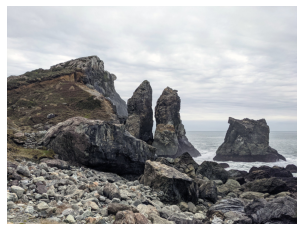

In [12]:
from tensorflow import keras
import matplotlib.pyplot as plt

base_image_path = keras.utils.get_file(
    "coast.jpg", origin="https://img-datasets.s3.amazonaws.com/coast.jpg")

plt.axis("off")
plt.imshow(keras.utils.load_img(base_image_path)) 

In [13]:
from tensorflow.keras.applications import inception_v3
model = inception_v3.InceptionV3(weights="imagenet", include_top=False) 

87910968/87910968 [==============================] - 2s 0us/step


In [14]:
layer_settings = {
    "mixed4": 1.0,
    "mixed5": 1.5,
    "mixed6": 2.0,
    "mixed7": 2.5,
}
outputs_dict = dict(
    [
        (
layer.name
, layer.output)
        for layer in [model.get_layer(name) for name in layer_settings.keys()]
    ]
)
feature_extractor = keras.Model(inputs=model.inputs, outputs=outputs_dict) 

In [15]:
def compute_loss(input_image):
    features = feature_extractor(input_image)
    loss = tf.zeros(shape=())
    for name in features.keys():
        coeff = layer_settings[name]
        activation = features[name]
        loss += coeff * tf.reduce_mean(tf.square(activation[:, 2:-2, 2:-2, :]))
    return loss 

In [18]:
import tensorflow as tf

@tf.function # 성능이 빨라짐 
def gradient_ascent_step(image, learning_rate): #기울기를 찾아서 올라감 거꾸로
    with tf.GradientTape() as tape:
        
        tape.watch(image)
        loss = compute_loss(image)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += learning_rate * grads
    return loss, image


def gradient_ascent_loop(image, iterations, learning_rate, max_loss=None):
    for i in range(iterations):
        loss, image = gradient_ascent_step(image, learning_rate)
        if max_loss is not None and loss > max_loss:
            break
        print(f"... 스텝 {i}에서 손실 값: {loss:.2f}")
    return image 

In [19]:
import numpy as np

def preprocess_image(image_path):
    img = keras.utils.load_img(image_path)
    img = keras.utils.img_to_array(img) # 이미지를 어레이로
    img = np.expand_dims(img, axis=0) # 차원 추가
    img = keras.applications.inception_v3.preprocess_input(img) #인셉션에 들어갈려면 이미지를 통과시킴 
    return img

def deprocess_image(img):
    img = img.reshape((img.shape[1], img.shape[2], 3))
    img += 1.0
    img *= 127.5
    img = np.clip(img, 0, 255).astype("uint8")
    return img 

In [21]:
step = 20.
num_octave = 3
octave_scale = 1.4
iterations = 30
max_loss = 15. 

In [22]:
original_img = preprocess_image(base_image_path)
original_shape = original_img.shape[1:3]

successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)
successive_shapes = successive_shapes[::-1]

shrunk_original_img = tf.image.resize(original_img, successive_shapes[0])

img = tf.identity(original_img)
for i, shape in enumerate(successive_shapes):
    print(f"{shape} 크기의 {i}번째 옥타브 처리") # 이미지 품질을 높이기위해 여러 걸 겹침
    img = tf.image.resize(img, shape)
    img = gradient_ascent_loop(
        img, iterations=iterations, learning_rate=step, max_loss=max_loss
    )
    upscaled_shrunk_original_img = tf.image.resize(shrunk_original_img, shape)
    same_size_original = tf.image.resize(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img
    img += lost_detail
    shrunk_original_img = tf.image.resize(original_img, shape)

keras.utils.save_img("dream.png", deprocess_image(img.numpy())) 

(459, 612) 크기의 0번째 옥타브 처리
... 스텝 0에서 손실 값: 0.80
... 스텝 1에서 손실 값: 1.07
... 스텝 2에서 손실 값: 1.44
... 스텝 3에서 손실 값: 1.82
... 스텝 4에서 손실 값: 2.16
... 스텝 5에서 손실 값: 2.50
... 스텝 6에서 손실 값: 2.85
... 스텝 7에서 손실 값: 3.18
... 스텝 8에서 손실 값: 3.53
... 스텝 9에서 손실 값: 3.91
... 스텝 10에서 손실 값: 4.31
... 스텝 11에서 손실 값: 4.64
... 스텝 12에서 손실 값: 4.98
... 스텝 13에서 손실 값: 5.37
... 스텝 14에서 손실 값: 5.69
... 스텝 15에서 손실 값: 6.08
... 스텝 16에서 손실 값: 6.44
... 스텝 17에서 손실 값: 6.79
... 스텝 18에서 손실 값: 7.13
... 스텝 19에서 손실 값: 7.45
... 스텝 20에서 손실 값: 7.76
... 스텝 21에서 손실 값: 8.05
... 스텝 22에서 손실 값: 8.44
... 스텝 23에서 손실 값: 8.70
... 스텝 24에서 손실 값: 9.00
... 스텝 25에서 손실 값: 9.26
... 스텝 26에서 손실 값: 9.56
... 스텝 27에서 손실 값: 9.84
... 스텝 28에서 손실 값: 10.11
... 스텝 29에서 손실 값: 10.36
(642, 857) 크기의 1번째 옥타브 처리
... 스텝 0에서 손실 값: 1.60
... 스텝 1에서 손실 값: 2.64
... 스텝 2에서 손실 값: 3.46
... 스텝 3에서 손실 값: 4.05
... 스텝 4에서 손실 값: 4.56
... 스텝 5에서 손실 값: 5.02
... 스텝 6에서 손실 값: 5.51
... 스텝 7에서 손실 값: 5.91
... 스텝 8에서 손실 값: 6.32
... 스텝 9에서 손실 값: 6.70
... 스텝 10에서 손실 값: 7.06
... 스텝 11에서 손실 값: 7.41


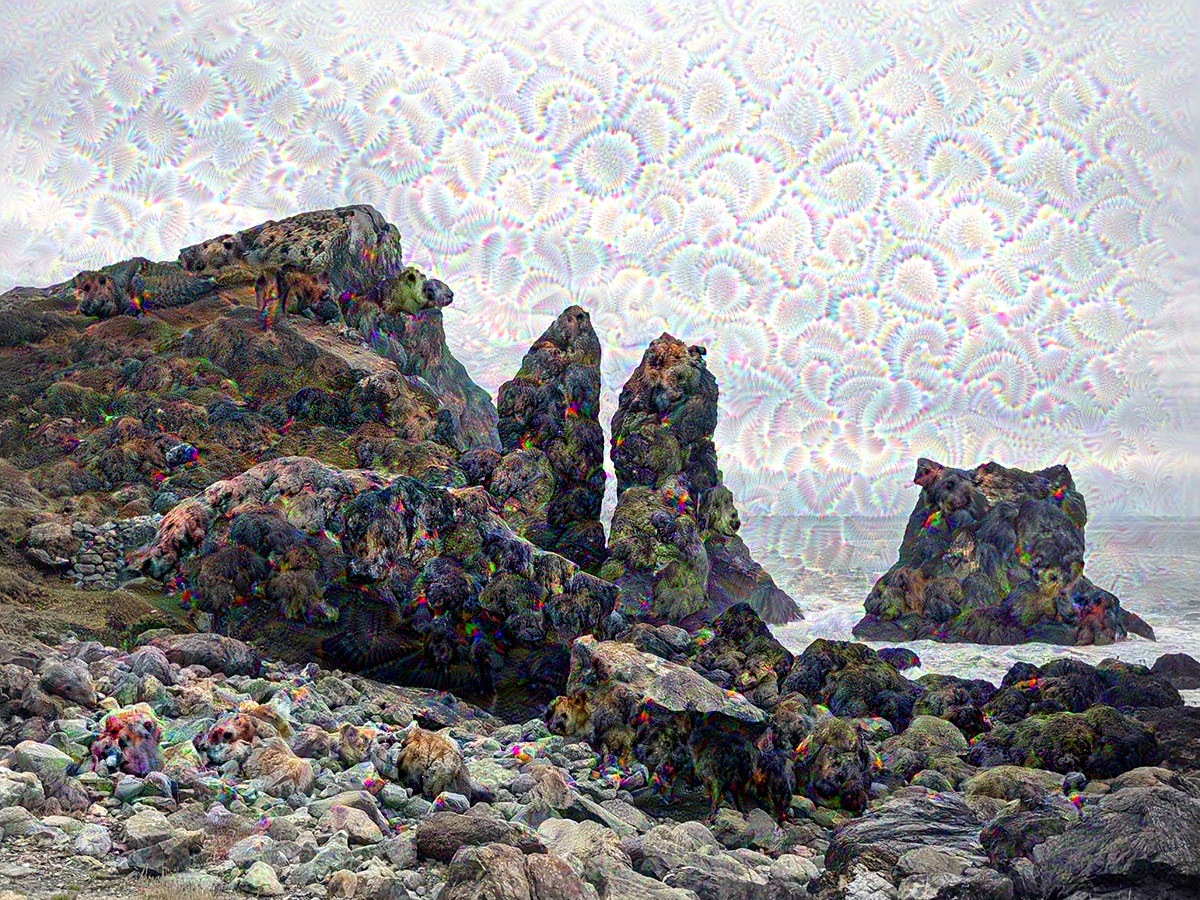

In [26]:
img = keras.utils.load_img("dream.png")
img

# 오토 인코더

In [ ]:
오토인코더는 무엇인가? 오토인코더는 비지도unsupervised 방식으로 훈련된 인공 신경망으로, 
먼저 데이터에 인코딩 된 표현을 학습한 다음, 학습 된 인코딩 표현에서 입력 데이터를 (가능한한 가깝게) 생성하는 것을 목표로 한다. 따라서, 오토인코더의 출력은 입력에 대한 예측이다.

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder") 

In [28]:
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

In [29]:
import tensorflow as tf

class Sampler(layers.Layer):
    def call(self, z_mean, z_log_var):
        batch_size = tf.shape(z_mean)[0]
        z_size = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch_size, z_size))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon 

In [30]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder") 

## vae

In [31]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [self.total_loss_tracker,
                self.reconstruction_loss_tracker,
                self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sampler(z_mean, z_log_var)
            reconstruction = decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + tf.reduce_mean(kl_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        } 

In [34]:
import numpy as np

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

In [33]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True)
vae.fit(mnist_digits, epochs=30, batch_size=128) 

Epoch 1/30
547/547 [==============================] - 82s 150ms/step - total_loss: 207.1981 - reconstruction_loss: 205.1513 - kl_loss: 2.0469
Epoch 2/30
547/547 [==============================] - 80s 146ms/step - total_loss: 176.9946 - reconstruction_loss: 174.5246 - kl_loss: 2.4699
Epoch 3/30
547/547 [==============================] - 81s 148ms/step - total_loss: 162.4449 - reconstruction_loss: 159.4283 - kl_loss: 3.0165
Epoch 4/30
547/547 [==============================] - 81s 149ms/step - total_loss: 157.3923 - reconstruction_loss: 154.2393 - kl_loss: 3.1529
Epoch 5/30
510/547 [==========================>...] - ETA: 5s - total_loss: 154.7572 - reconstruction_loss: 151.4901 - kl_loss: 3.2670

KeyboardInterrupt: 

# AutoEncoder를 사용한 이상탐지

In [ ]:
originality from https://www.pyimagesearch.com/2020/03/02/anomaly-detection-with-keras-tensorflow-and-deep-learning/


In [36]:
#pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.


In [37]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras import backend as K
import numpy as np

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import random
import pickle
import cv2
import matplotlib 

In [44]:
def build_unsupervised_dataset(data, labels, validLabel=1, anomalyLabel=3, contam=0.01, seed=42):

  # 레이블 1인 영상의 인덱스
	validIdxs = np.where(labels == validLabel)[0]
  # 레이블 3인 영상의 인덱스
	anomalyIdxs = np.where(labels == anomalyLabel)[0]

  # 무작위로 섞어 주고
	random.shuffle(validIdxs)
	random.shuffle(anomalyIdxs)

  # 비정상 데이터의 갯수를 비정상 데이터 갯수 대비 0.01(contam)로 한다.
	i = int(len(validIdxs) * contam)
	anomalyIdxs = anomalyIdxs[:i]

	print("len(validIdx)=",len(validIdxs))
	print("len(anomalyIdxs)=",len(anomalyIdxs))

  # 추려낸 정상 데이터와 비정상 제이터
	validImages = data[validIdxs]
	anomalyImages = data[anomalyIdxs]

  # 두개의 데이터를 합하고, 다시 섞어주고
	images = np.vstack([validImages, anomalyImages])
	np.random.seed(seed)
	np.random.shuffle(images)

	return images

In [45]:
images = build_unsupervised_dataset(trainX, trainY, validLabel=1, anomalyLabel=3, contam=0.01) 

len(validIdx)= 6742
len(anomalyIdxs)= 67


In [47]:
print(images.shape)
print(np.max(images))
print(np.min(images))

(6809, 28, 28)
255
0


In [48]:
images = np.expand_dims(images, axis=-1)
images = images.astype("float32") / 255.0 

In [49]:
(trainX, testX) = train_test_split(images, test_size=0.2, random_state=42) 

(5447, 28, 28, 1)
(1362, 28, 28, 1)


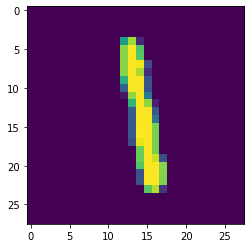

In [50]:
print(trainX.shape)
print(testX.shape)
for i in range(10):
    plt.imshow(trainX[i].reshape((28,28)))
plt.show() 

In [51]:
class ConvAutoencoder:

	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		inputShape = (height, width, depth)
		chanDim = -1

		inputs = Input(shape=inputShape)
		x = inputs

		for f in filters:
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)

		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim)(x)

		encoder = Model(inputs, latent, name="encoder")




		latentInputs = Input(shape=(latentDim,))
		x = Dense(np.prod(volumeSize[1:]))(latentInputs)
		x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)

		for f in filters[::-1]:
			# apply a CONV_TRANSPOSE => RELU => BN operation
			x = Conv2DTranspose(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)

		x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
		outputs = Activation("sigmoid")(x)

		decoder = Model(latentInputs, outputs, name="decoder")



		autoencoder = Model(inputs, decoder(encoder(inputs)), name="autoencoder")


		return autoencoder 

In [52]:
autoencoder = ConvAutoencoder.build(28, 28, 1)
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                69392     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         109377    
                                                                 
Total params: 178,769
Trainable params: 178,385
Non-trainable params: 384
_________________________________________________________________


In [41]:
# AutoEncoder를 사용한 이상탐지

# 정상인 데이터들 중에 소수의 비정상인 데이터가 포함되어 있다.

# AutoEncoder를 사용하여 학습 시킨다.

# 이렇게 학습된 AutoEncoder는 대부분의 정상 데이터에 대하여 복원 능력이 있다. 하지만 소소의 비정상 데이터에 대해서는 제대로 복원하지 못한다.

# 이렇게 학습시킨 AutoEncoder를 가지고 특정영상을 복원 하게 하고 그 복원 결과가 좋지 않을 경우 정상영상이 아니라고 판정한다.

originality from 
https://www.pyimagesearch.com/2020/03/02/anomaly-detection-with-keras-tensorflow-and-deep-learning/

SyntaxError: invalid syntax (23667502.py, line 11)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras import backend as K
import numpy as np

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import random
import pickle
import cv2
import matplotlib

In [ ]:
pip install opencv-python

In [42]:
# 데이터 준비

## 데이터 로딩

((trainX, trainY), (testX, testY)) = mnist.load_data()

## 데이터셋 생성

# 1의 레이블 영상이 정상이고 3의 레이블 영상이 비정상으로 한다.

# 정상 영상과 비정상 영상의 비율을 100:1로 해서 골라내고, 골고루 섞은 데이터셋을 만든다.



def build_unsupervised_dataset(data, labels, validLabel=1, anomalyLabel=3, contam=0.01, seed=42):

  # 레이블 1인 영상의 인덱스
	validIdxs = np.where(labels == validLabel)[0]
  # 레이블 3인 영상의 인덱스
	anomalyIdxs = np.where(labels == anomalyLabel)[0]

  # 무작위로 섞어 주고
	random.shuffle(validIdxs)
	random.shuffle(anomalyIdxs)

  # 비정상 데이터의 갯수를 비정상 데이터 갯수 대비 0.01(contam)로 한다.
	i = int(len(validIdxs) * contam)
	anomalyIdxs = anomalyIdxs[:i]

	print("len(validIdx)=",len(validIdxs))
	print("len(anomalyIdxs)=",len(anomalyIdxs))

  # 추려낸 정상 데이터와 비정상 제이터
	validImages = data[validIdxs]
	anomalyImages = data[anomalyIdxs]

  # 두개의 데이터를 합하고, 다시 섞어주고
	images = np.vstack([validImages, anomalyImages])
	np.random.seed(seed)
	np.random.shuffle(images)

	return images

In [43]:
images = build_unsupervised_dataset(trainX, trainY, validLabel=1, anomalyLabel=3, contam=0.01)

print(images.shape)
print(np.max(images))
print(np.min(images))

len(validIdx)= 6742
len(anomalyIdxs)= 67
(6809, 28, 28)
255
0


In [53]:
opt = Adam(learning_rate=1e-3, decay=0.0025)
autoencoder.compile(loss="mse", optimizer=opt)

## 학습

history = autoencoder.fit(trainX, trainX, validation_split=0.1, epochs=20, batch_size=32)

Epoch 1/20
154/154 [==============================] - 5s 28ms/step - loss: 0.0477 - val_loss: 0.0442
Epoch 2/20
154/154 [==============================] - 4s 26ms/step - loss: 0.0085 - val_loss: 0.0310
Epoch 3/20
154/154 [==============================] - 4s 26ms/step - loss: 0.0046 - val_loss: 0.0126
Epoch 4/20
154/154 [==============================] - 4s 26ms/step - loss: 0.0037 - val_loss: 0.0046
Epoch 5/20
154/154 [==============================] - 4s 26ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 6/20
154/154 [==============================] - 4s 27ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 7/20
154/154 [==============================] - 4s 26ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 8/20
154/154 [==============================] - 4s 26ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 9/20
154/154 [==============================] - 4s 26ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 10/20
154/154 [==============================] - 4s 26ms/step - loss: 0.0024 - val_lo

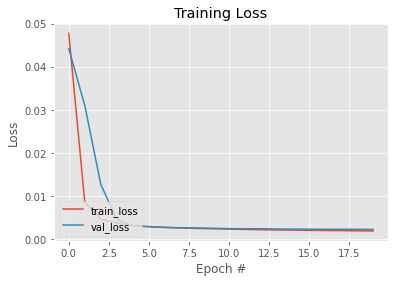

In [54]:
N = np.arange(len(history.history['loss']))

plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

43/43 [==============================] - 1s 11ms/step


()

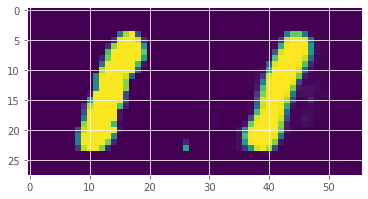

In [55]:
## 테스트 데이터에 대한 복원 실행

reconstructed = autoencoder.predict(testX)

for i in range(10):
  combined = np.hstack([testX[i], reconstructed[i]])
  plt.imshow(combined.squeeze())
  
plt.show
()


In [ ]:
# 이상 탐지

학습된 AutoEncoder는 1 영상(정상 영상)의 경우 잘 복원한다. 그러나 그렇지 않은 경우 잘 복원하지 못한다.


1의 영상은 정상이고, 3의 영상은 비정상이다.

또한 1이외의 정상 역시 비정상이다.

<br>

AutoEncoder를 사용하여 인코딩과 디코딩을 통해 복원하고, 복원된 것이 원본과 차이가 날 수록 비정상인것으로 판단한다.

## 복원 실행

43/43 [==============================] - 1s 12ms/step


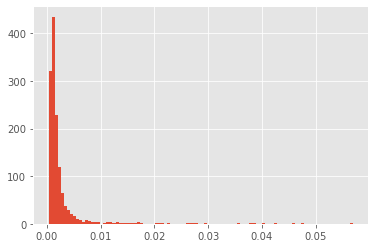

In [56]:
reconstructed = autoencoder.predict(testX)

## 차이 계산

errors = []

for (image, recon) in zip(testX, reconstructed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
	mse = np.mean((image - recon) ** 2)
	errors.append(mse)

plt.hist(errors, bins=100)
plt.show()

In [ ]:
데이터의 1/101이 비정상 데이터이다.

quantile 0.99 이상이 되는 threshold를 구하자.


0.023841753490269516
14


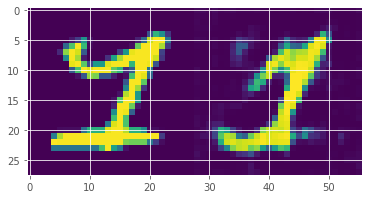

In [57]:
threshold = np.quantile(errors, 0.99)
print(threshold)

anomaly_idxs = np.where(np.array(errors) >= threshold)[0]
print(len(anomaly_idxs))

for i in anomaly_idxs:
  combined = np.hstack([testX[i], reconstructed[i]])
  plt.imshow(combined.squeeze())
  
plt.show()

In [ ]:
비정상 영상인 3자와, 정말 이상하게 생긴 1자를 잘 찾아 냈다.

# 1과 3 이외의 입력

(10000, 28, 28, 1)
(1362, 28, 28, 1)
313/313 [==============================] - 4s 11ms/step


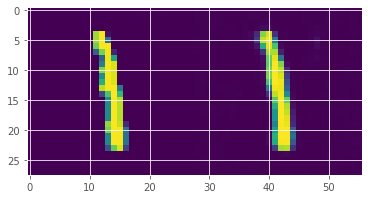

In [58]:
((trainX, trainY), (testX, testY)) = mnist.load_data()

testX = np.expand_dims(testX, axis=-1)
testX = testX.astype("float32") / 255.0

print(testX.shape)
print(reconstructed.shape)

reconstructed = autoencoder.predict(testX)

for i in range(30):
  combined = np.hstack([testX[i], reconstructed[i]])
  plt.imshow(combined.squeeze())
  
plt.show() 

In [ ]:
# AutoEncoder를 사용한 이상탐지

정상인 데이터들 중에 소수의 비정상인 데이터가 포함되어 있다.

AutoEncoder를 사용하여 학습 시킨다.

이렇게 학습된 AutoEncoder는 대부분의 정상 데이터에 대하여 복원 능력이 있다. 하지만 소소의 비정상 데이터에 대해서는 제대로 복원하지 못한다.

이렇게 학습시킨 AutoEncoder를 가지고 특정영상을 복원 하게 하고 그 복원 결과가 좋지 않을 경우 정상영상이 아니라고 판정한다.

originality from 
https://www.pyimagesearch.com/2020/03/02/anomaly-detection-with-keras-tensorflow-and-deep-learning/


from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras import backend as K
import numpy as np

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import random
import pickle
import cv2
import matplotlib


pip install opencv-python

# 데이터 준비

## 데이터 로딩

((trainX, trainY), (testX, testY)) = mnist.load_data()

## 데이터셋 생성

1의 레이블 영상이 정상이고 3의 레이블 영상이 비정상으로 한다.

정상 영상과 비정상 영상의 비율을 100:1로 해서 골라내고, 골고루 섞은 데이터셋을 만든다.



def build_unsupervised_dataset(data, labels, validLabel=1, anomalyLabel=3, contam=0.01, seed=42):

  # 레이블 1인 영상의 인덱스
	validIdxs = np.where(labels == validLabel)[0]
  # 레이블 3인 영상의 인덱스
	anomalyIdxs = np.where(labels == anomalyLabel)[0]

  # 무작위로 섞어 주고
	random.shuffle(validIdxs)
	random.shuffle(anomalyIdxs)

  # 비정상 데이터의 갯수를 비정상 데이터 갯수 대비 0.01(contam)로 한다.
	i = int(len(validIdxs) * contam)
	anomalyIdxs = anomalyIdxs[:i]

	print("len(validIdx)=",len(validIdxs))
	print("len(anomalyIdxs)=",len(anomalyIdxs))

  # 추려낸 정상 데이터와 비정상 제이터
	validImages = data[validIdxs]
	anomalyImages = data[anomalyIdxs]

  # 두개의 데이터를 합하고, 다시 섞어주고
	images = np.vstack([validImages, anomalyImages])
	np.random.seed(seed)
	np.random.shuffle(images)

	return images

images = build_unsupervised_dataset(trainX, trainY, validLabel=1, anomalyLabel=3, contam=0.01)

print(images.shape)
print(np.max(images))
print(np.min(images))

## 데이터 모양 변경, Normalization

Conv2D 사용을 위해 데이터 모양을 (H, W, channel)의 3차원으로 만들고
(28, 28) -> (28, 28, 1)

0 ~ 1.0으로 normlaization 한다.



images = np.expand_dims(images, axis=-1)
images = images.astype("float32") / 255.0

print(images.shape)
print(np.max(images))
print(np.min(images))

## 데이터 분리

(trainX, testX) = train_test_split(images, test_size=0.2, random_state=42)

print(trainX.shape)
print(testX.shape)

print(trainX.shape)
print(testX.shape)
for i in range(10):
  plt.imshow(trainX[i].reshape((28,28)))
  
plt.show
()

# 학습

## 모델 정의

class ConvAutoencoder:

	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
		inputShape = (height, width, depth)
		chanDim = -1

		inputs = Input(shape=inputShape)
		x = inputs

		for f in filters:
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)

		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim)(x)

		encoder = Model(inputs, latent, name="encoder")




		latentInputs = Input(shape=(latentDim,))
		x = Dense(
np.prod
(volumeSize[1:]))(latentInputs)
		x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)

		for f in filters[::-1]:
			# apply a CONV_TRANSPOSE => RELU => BN operation
			x = Conv2DTranspose(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)

		x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
		outputs = Activation("sigmoid")(x)

		decoder = Model(latentInputs, outputs, name="decoder")



		autoencoder = Model(inputs, decoder(encoder(inputs)), name="autoencoder")


		return autoencoder

## 모델 생성

autoencoder = 
ConvAutoencoder.build
(28, 28, 1)
autoencoder.summary()

## 모델 컴파일

# decay값은 1 step 마다 감소하는 비율
opt = Adam(learning_rate=1e-3, decay=0.0025)
autoencoder.compile(loss="mse", optimizer=opt)

## 학습

history = 
autoencoder.fit
(trainX, trainX, validation_split=0.1, epochs=20, batch_size=32)

N = np.arange(len(history.history['loss']))

plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")

## 테스트 데이터에 대한 복원 실행

reconstructed = autoencoder.predict(testX)

for i in range(10):
  combined = np.hstack([testX[i], reconstructed[i]])
  plt.imshow(combined.squeeze())
  
plt.show
()

# 이상 탐지

학습된 AutoEncoder는 1 영상(정상 영상)의 경우 잘 복원한다. 그러나 그렇지 않은 경우 잘 복원하지 못한다.


1의 영상은 정상이고, 3의 영상은 비정상이다.

또한 1이외의 정상 역시 비정상이다.

<br>

AutoEncoder를 사용하여 인코딩과 디코딩을 통해 복원하고, 복원된 것이 원본과 차이가 날 수록 비정상인것으로 판단한다.

## 복원 실행

reconstructed = autoencoder.predict(testX)

## 차이 계산

errors = []

for (image, recon) in zip(testX, reconstructed):
	# compute the mean squared error between the ground-truth image
	# and the reconstructed image, then add it to our list of errors
	mse = np.mean((image - recon) ** 2)
	errors.append(mse)

plt.hist(errors, bins=100)
plt.show
()

데이터의 1/101이 비정상 데이터이다.

quantile 0.99 이상이 되는 threshold를 구하자.

threshold = np.quantile(errors, 0.99)
print(threshold)

anomaly_idxs = np.where(np.array(errors) >= threshold)[0]
print(len(anomaly_idxs))

for i in anomaly_idxs:
  combined = np.hstack([testX[i], reconstructed[i]])
  plt.imshow(combined.squeeze())
  
plt.show
()

비정상 영상인 3자와, 정말 이상하게 생긴 1자를 잘 찾아 냈다.

# 1과 3 이외의 입력

((trainX, trainY), (testX, testY)) = mnist.load_data()

testX = np.expand_dims(testX, axis=-1)
testX = testX.astype("float32") / 255.0

print(testX.shape)
print(reconstructed.shape)

reconstructed = autoencoder.predict(testX)

for i in range(30):
  combined = np.hstack([testX[i], reconstructed[i]])
  plt.imshow(combined.squeeze())
  
plt.show
() 